## Store Sales - Time Series Forecasting

### **Descriptions**

**train.csv:**
* store_nbr =  identifies the store at which the products are sold.
* family =  identifies the type of product sold.
* sales = total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* onpromotion = the total number of items in a product family that were being promoted at a store at a given date.

**test.csv:**
* Same features as the training data. The target sales for the dates in this files.
* The dates in the test are for the 15 days after the last date in the training data.

**stores.csv**

* Store metadata: city, state, type and cluster.
* Cluster is a grouping of similar stores.

**oil.csv**

* Daily oil price. Include values during both the train and test data timeframes.
* Ecuador is an oil-dependent country and it´s economical health is highly bulnerable to shocks in oil prices.


**Holidays_events.csv**

* Holidays and events, with metadata.
* Transferred column: A transferred day is more like a normal day than a holiday.

**Additional Notes**
* Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this. (Seasonality?)
* A magnitude 7.8 earthquake struck Ecuador on `April 16, 2016`. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1st Part: **EDA**

In [3]:
# Paths
train_pth = r"C:\Users\willi\OneDrive\Documentos\5. Estudos\Kaggle_Notebooks\Store_Sales\data\train.csv"
test_pth = r"C:\Users\willi\OneDrive\Documentos\5. Estudos\Kaggle_Notebooks\Store_Sales\data\test.csv"
stores_pth = r"C:\Users\willi\OneDrive\Documentos\5. Estudos\Kaggle_Notebooks\Store_Sales\data\stores.csv"
oil_pth = r"C:\Users\willi\OneDrive\Documentos\5. Estudos\Kaggle_Notebooks\Store_Sales\data\oil.csv"
transactions_pth = r"C:\Users\willi\OneDrive\Documentos\5. Estudos\Kaggle_Notebooks\Store_Sales\data\transactions.csv"
holidays_events_pth = r"C:\Users\willi\OneDrive\Documentos\5. Estudos\Kaggle_Notebooks\Store_Sales\data\holidays_events.csv"

In [82]:
# Datasets
train = pd.read_csv(train_pth)
stores = pd.read_csv(stores_pth)
oil = pd.read_csv(oil_pth)
events = pd.read_csv(holidays_events_pth)
transactions = pd.read_csv(transactions_pth)

# Merge train -  stores - transactions
df = pd.merge(train,stores,on='store_nbr')
df = pd.merge_ordered(df, transactions, on=['date', 'store_nbr'])

# Merge DataFrame - Events
df = pd.merge(df, events, on=['date'], how='outer')

# Merge Dataframe - Oil
df = pd.merge(df, oil, on=['date'], how='outer')

df.drop('id', axis=1, inplace=True)

# Filling NaN with zeros
df.fillna(0, inplace=True)

# Rename Columns
df.rename(columns={'type_x':'type_store', 'type_y':'type_day'}, inplace=True)

# Extracting Days of Week
df['date'] = pd.to_datetime(df['date'])
df['day_week_name'] = df['date'].dt.dayofweek
df['is_weekend'] = np.where(df['day_week_name'].isin([6,5]), 1, 0)

# Create a Data Index
df.set_index('date', inplace=True)

# Drop zeros in Sales Columns
df = df[df['sales'] != 0]

In [94]:
df


,store_nbr,family,sales,onpromotion,city,state,type_store,cluster,transactions,type_day,locale,locale_name,description,transferred,dcoilwtico,day_week_name,is_weekend
date,,,,,,,,,,,,,,,,,
2013-01-01,25.0,BEAUTY,2.000,0.0,Salinas,Santa Elena,D,1.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,0.00,1,0
2013-01-01,25.0,BEVERAGES,810.000,0.0,Salinas,Santa Elena,D,1.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,0.00,1,0
2013-01-01,25.0,BREAD/BAKERY,180.589,0.0,Salinas,Santa Elena,D,1.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,0.00,1,0
2013-01-01,25.0,CLEANING,186.000,0.0,Salinas,Santa Elena,D,1.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,0.00,1,0
2013-01-01,25.0,DAIRY,143.000,0.0,Salinas,Santa Elena,D,1.0,770.0,Holiday,National,Ecuador,Primer dia del ano,False,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,54.0,PLAYERS AND ELECTRONICS,2.000,0.0,El Carmen,Manabi,C,3.0,802.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,0
2017-08-15,54.0,POULTRY,59.619,0.0,El Carmen,Manabi,C,3.0,802.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,0
2017-08-15,54.0,PREPARED FOODS,94.000,0.0,El Carmen,Manabi,C,3.0,802.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,1,0


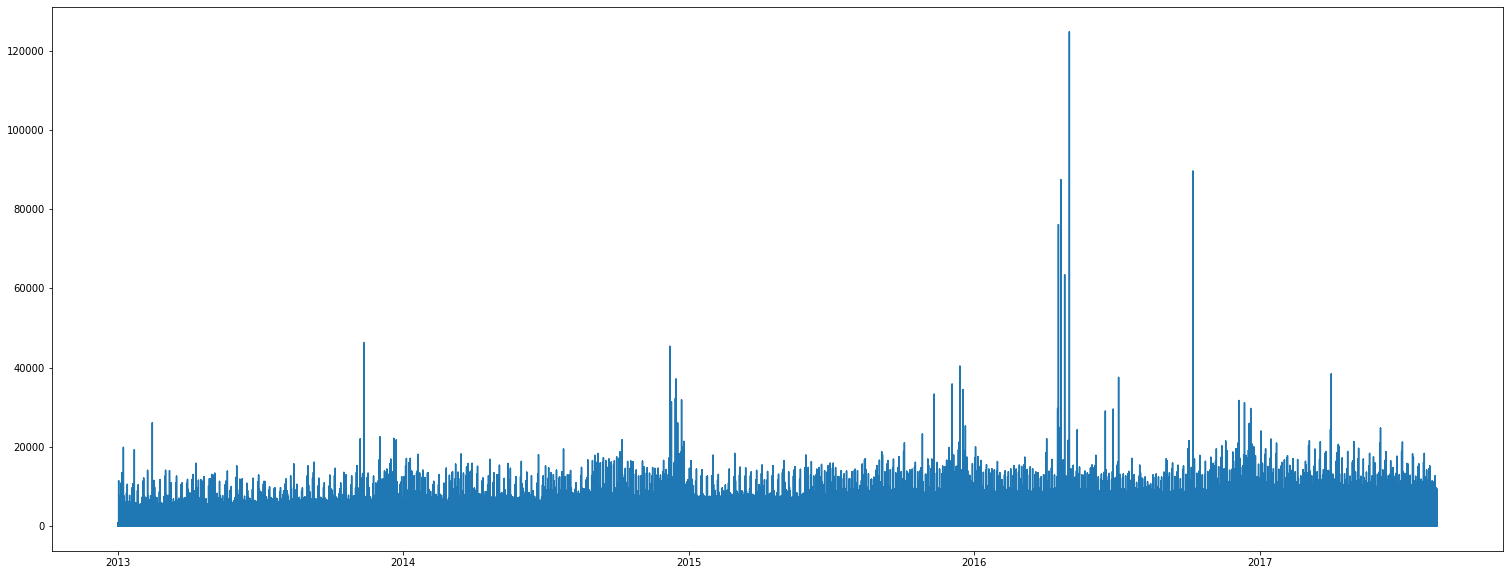

In [96]:
# Plotting Sales
plt.figure(figsize=(26,10))
plt.plot(df.sales)
plt.show()

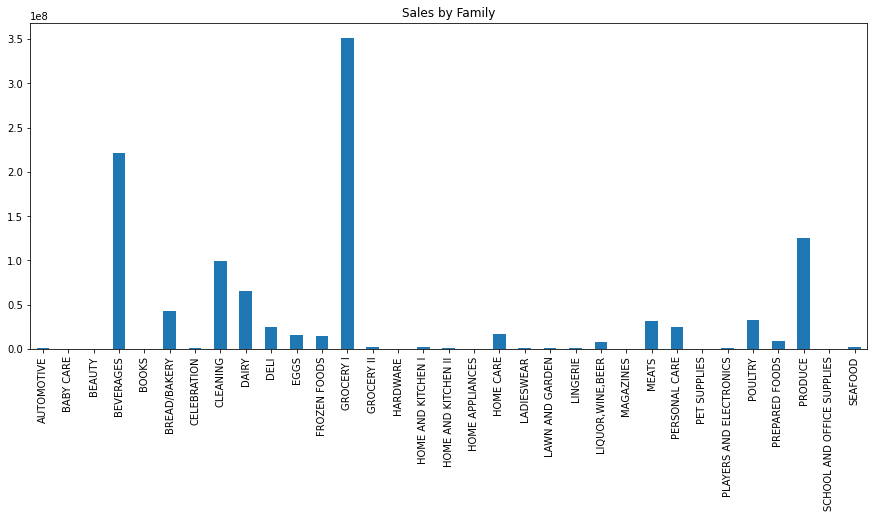

In [108]:
plt.figure(figsize=(15,6))
df.groupby(df.family)['sales'].sum().plot(kind='bar')
plt.title('Sales by Family')
plt.xlabel("")
plt.show()